# *Desafio da aula de Inteligencia Artificial para Gestão da Informação ministrado pela prof. Denise**

Por  **Patrick F. R. Ribeiro**

**Objetivo da atividade:** aplicação do algoritmo de Perceptron

A  base de dados utilizadas se encontra disponível em: https://archive.ics.uci.edu/dataset/109/wine

In [ ]:
# Importando a biblioteca pandas
import pandas as pd

# Importando a função train_test_split da biblioteca sklearn.model_selection
# Esta função é usada para dividir o conjunto de dados em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split

# Importando a classe StandardScaler da biblioteca sklearn.preprocessing
# O StandardScaler é usado para padronizar os dados, tornando-os com média zero e desvio padrão 1
from sklearn.preprocessing import StandardScaler

# Importando a classe Perceptron da biblioteca sklearn.linear_model
# O Perceptron é um algoritmo de aprendizado de máquina para classificação binária
from sklearn.linear_model import Perceptron

# Importando a função mean_squared_error da biblioteca sklearn.metrics
# Esta função é usada para calcular o erro médio quadrático (MSE) para avaliação de modelos de regressão
from sklearn.metrics import mean_squared_error

In [4]:
import pandas as pd

# Abrindo arquivo
df = pd.read_excel('wine.xlsx')

# Exiba as primeiras linhas do DataFrame para ver o conteúdo
df.head()

,Alcohol,MalicAcid,Ash,Alcalinity,Mag,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,OD280,Proline
0,95954147,310344828,754658385,0.52,783951.0,727272727.0,778625954,424242424.0,639664804,433846154.0,608187135,0.98,633928571.0
1,89008766,323049002,664596273,373333.00,617284.0,688311688.0,702290076,393939394.0,357541899,336923077.0,614035088,0.85,625.0
2,887390425,42831216,829192547,0.62,623457.0,727272727.0,824427481,454545455.0,784916201,436923077.0,602339181,7925.00,705357143.0
3,968981794,353901996,776397516,0.56,697531.0,1.0,888040712,363636364.0,608938547,0.6,502923977,8625.00,880952381.0
4,892784895,470054446,891304348,0.70,728395.0,727272727.0,684478372,590909091.0,508379888,332307692.0,608187135,7325.00,4375.0


In [5]:
# Descrição da base de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          148 non-null    int64  
 1   MalicAcid        148 non-null    int64  
 2   Ash              148 non-null    int64  
 3   Alcalinity       148 non-null    float64
 4   Mag              148 non-null    float64
 5   Phenols          148 non-null    float64
 6   Flavanoids       148 non-null    int64  
 7   Nonflavanoid     148 non-null    float64
 8   Proanthocyanins  148 non-null    int64  
 9   Color            148 non-null    float64
 10  Hue              148 non-null    int64  
 11  OD280            148 non-null    float64
 12  Proline          148 non-null    float64
dtypes: float64(7), int64(6)
memory usage: 15.2 KB


In [6]:
# Dividir os dados em entradas (X) e saída-meta (y)
X = df.drop('Alcohol', axis=1)  # Remova a coluna 'Alcohol' para as características
y = df['Alcohol']  # Coluna 'Alcohol' será o alvo

In [7]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# - X é o conjunto de recursos (variáveis independentes).
# - y é o conjunto de rótulos (variável dependente).
# - test_size=0.2 indica que 20% dos dados serão usados como conjunto de teste,
#   enquanto 80% serão usados como conjunto de treinamento.
# - random_state=42 é uma semente para garantir que a divisão dos dados seja reproduzível.

In [8]:
# Normalizar as características dos dados
scaler = StandardScaler()
# Aplicando o StandardScaler aos conjuntos de treinamento e teste.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# O StandardScaler é usado para padronizar (escalar) os dados, garantindo que tenham média zero e desvio padrão igual a 1.

# - X_train_scaled: Conjunto de treinamento escalado. Os dados de treinamento são usados para ajustar o scaler.
# - X_test_scaled: Conjunto de teste escalado. Os dados de teste são transformados com base no ajuste feito nos dados de treinamento.

In [9]:
# Criar e treinar o Modelo de Perceptron
perceptron = Perceptron() # Cria uma instância perceptron que chama a função do Perceptron
# Treina o modelo Perceptron com os conjuntos de treinamento escalados.
# - X_train_scaled: Conjunto de treinamento escalado, contendo os recursos de treinamento padronizados.
# - y_train: Conjunto de rótulos correspondente aos dados de treinamento.
perceptron.fit(X_train_scaled, y_train)

Perceptron()

In [10]:
# Lista para armazenar os valores dos pesos e bias durante o treinamento
weights_history = []

In [11]:
# Treinamento do modelo e registro dos pesos em cada iteração
# Loop de treinamento para ajustar o modelo Perceptron em várias épocas (100 no exemplo).
for epoch in range(100):

    # Realiza um treinamento parcial (online learning) do Perceptron em cada época.
    # - X_train_scaled: Conjunto de treinamento escalado, contendo os recursos de treinamento padronizados.
    # - y_train: Conjunto de rótulos correspondente aos dados de treinamento.
    # - classes=y_train.unique().tolist(): Certifica-se de passar as classes corretamente para o treinamento parcial.
    perceptron.partial_fit(X_train_scaled, y_train, classes=y_train.unique().tolist())

    # Registra o histórico dos pesos (coeficientes) e do termo de interceptação do Perceptron em cada época.
    weights_history.append((perceptron.coef_[0].copy(), perceptron.intercept_.copy()))

In [12]:
# Visualizar a evolução dos pesos
# Loop para iterar sobre o histórico de pesos e bias em cada época.
for epoch, (weights, bias) in enumerate(weights_history):
    # Imprime o número da época atual, os pesos e o bias correspondentes.
    print(f'Época {epoch + 1} - Pesos: {weights}, Bias: {bias}')

Época 1 - Pesos: [ 2.60848804  0.18808146  0.88917876  2.32619872  1.50958211 -2.64336109
 -0.59477154  2.69318576 -1.66409117  1.71965097  1.9786509  -1.84556784], Bias: [-13. -11. -14. -10. -16. -21. -14. -12. -12. -13. -16. -18. -12. -12.
 -13. -14. -17. -11. -14. -10. -13. -11. -19. -13. -12. -11. -19. -15.
 -15. -29. -15. -17. -18. -14. -15. -10. -13. -13. -15. -15. -13. -11.
 -10. -16. -15. -16. -15. -16. -15. -20. -19. -17. -18. -13. -15. -17.
 -18. -16. -12. -14. -12.  -9. -12. -13. -13. -13. -13. -15. -18. -15.
 -13. -13. -16. -12. -13. -10. -12. -13. -15. -16. -23. -15. -12. -11.
 -11.  -9. -15. -12. -13. -12.]
Época 2 - Pesos: [ 2.60848804  0.18808146  0.88917876  2.32619872  1.50958211 -2.64336109
 -0.59477154  2.69318576 -1.66409117  1.71965097  1.9786509  -1.84556784], Bias: [-13. -11. -13. -10. -16. -20. -16. -12. -12. -13. -16. -18. -12. -12.
 -13. -14. -18. -11. -14. -10. -14. -11. -17. -13. -12. -11. -19. -14.
 -15. -29. -16. -17. -18. -14. -15. -10. -14. -14. -15. -1

In [13]:
# Avaliar desempenho do modelo e  calcular a métrica desejada, como o erro médio quadrático
# Faz previsões no conjunto de teste usando o modelo Perceptron treinado.
y_pred = perceptron.predict(X_test_scaled)

# Calcula o erro médio quadrático (MSE) entre as previsões e os rótulos reais do conjunto de teste.
mse = mean_squared_error(y_test, y_pred)

# Imprime o valor do MSE para avaliar o desempenho do modelo no conjunto de teste.
print(f"Erro médio quadrático no conjunto de teste: {mse}")

Erro médio quadrático no conjunto de teste: 2.0095713884779677e+17


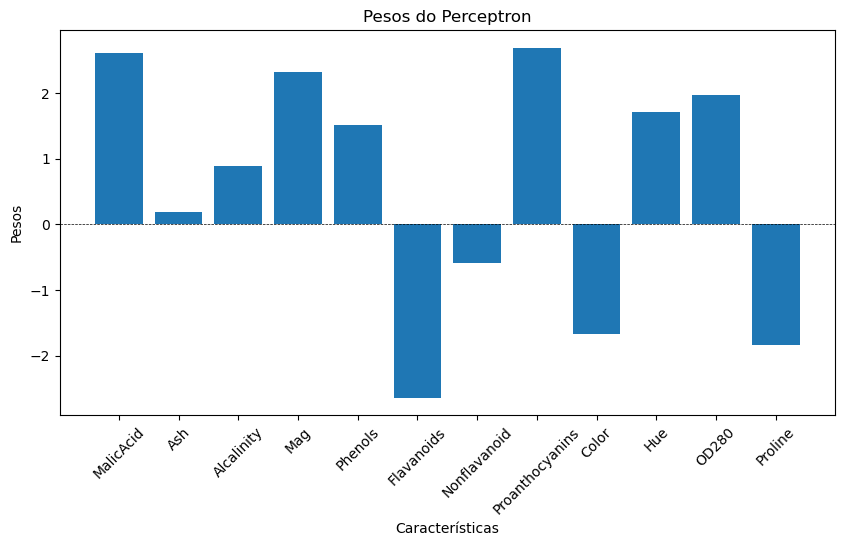

In [14]:
import matplotlib.pyplot as plt

# Obter os coeficientes (pesos) e bias do Perceptron
coefficients = perceptron.coef_[0] # Coeficientes (pesos)
bias = perceptron.intercept_ # Bias

# Plotar os pesos e bias
plt.figure(figsize=(10, 5))
plt.bar(range(len(coefficients)), coefficients)
plt.xlabel('Características')
plt.ylabel('Pesos')
plt.title('Pesos do Perceptron')
plt.xticks(range(len(coefficients)), X.columns, rotation=45)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.show()